In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Create a 5x5 grid world (state space)
size = 5
q_table = np.zeros((size, size, 4))  # Q-table with 4 possible actions (up, down, left, right)

# Reward Table (Goal at position [4,4])
rewards = np.full((size, size), -1)  # Default reward -1 for all states
rewards[4, 4] = 100  # Goal state 🏆

In [3]:
# Actions: 0 = up, 1 = down, 2 = left, 3 = right
actions = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}

# Function to check if move is valid
def is_valid_move(x, y):
    return 0 <= x < size and 0 <= y < size

In [4]:
# Q-Learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500  # Number of training episodes

for episode in range(episodes):
    x, y = 0, 0  # Start position
    while (x, y) != (4, 4):  # Until goal is reached
        if random.uniform(0, 1) < epsilon:
            action = random.choice(list(actions.keys()))  # Explore (random action)
        else:
            action = np.argmax(q_table[x, y])  # Exploit (best action)

        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy
        
        if is_valid_move(new_x, new_y):
            reward = rewards[new_x, new_y]
            q_table[x, y, action] = (1 - alpha) * q_table[x, y, action] + alpha * (reward + gamma * np.max(q_table[new_x, new_y]))
            x, y = new_x, new_y


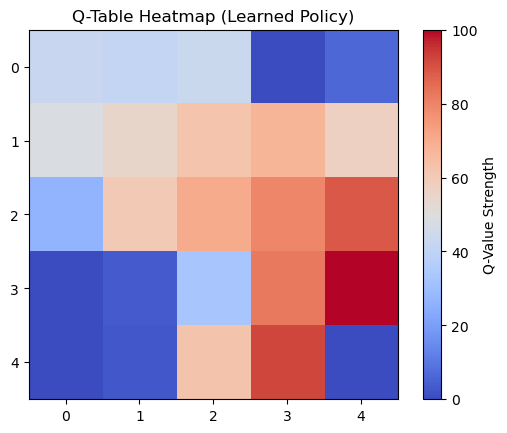

In [5]:
plt.imshow(np.max(q_table, axis=2), cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Q-Value Strength")
plt.title("Q-Table Heatmap (Learned Policy)")
plt.show()